<h1>Objective:</h1>
The objective of this data analysis project is to gain insights into the ecommerce order
data of a fictional company. We will analyze customer information, product details, and
order history to derive meaningful conclusions that can aid business decision-making.

In [58]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [59]:
connection = mysql.connector.connect(
user='root',
password='1234',
host='localhost',
database='ecommerce')

In [60]:
cursor=connection.cursor()

In [61]:
cursor.execute("select * from product")
product_df=pd.DataFrame(cursor.fetchall(),columns=[col[0] for col in cursor.description])

cursor.execute("select * from order_details")
order_df=pd.DataFrame(cursor.fetchall(),columns=[col[0] for col in cursor.description])

cursor.execute("select * from customer")
customer_df=pd.DataFrame(cursor.fetchall(),columns=[col[0] for col in cursor.description])

cursor.close()
connection.close()

<h1>Data cleaning for Product Table</h1>

In [62]:
product_df.shape

(61, 7)

In [63]:
product_df.head()

,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,P102,Chair,furniture,Chairs,20000.0,15000.00,10
1,P103,Laptop,Electronics,computer,60000.0,55000.00,50
2,P104,Smartphone,Electronics,phone,45000.0,40000.00,20
3,P105,Blender,Appliance,Electronics,500.0,450.00,10
4,P106,Laptop HP,Electronics,Computers,67200.0,55000.99,50


In [64]:
product_df.tail()

,product_id,product_name,category,sub_category,original_price,selling_price,stock
56,P158,Electric Toothbrush,Appliance,Electronics,4000.0,3000.0,18
57,P159,Car Vacuum,Appliance,Electronics,5000.0,4000.0,20
58,P160,Portable Speaker,Appliance,Electronics,3500.0,3000.0,22
59,P161,Smart Scale,Appliance,Electronics,3000.0,2500.0,20
60,P162,Streaming Device,Electronics,Accessories,5000.0,4000.0,18


In [65]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      61 non-null     object 
 1   product_name    61 non-null     object 
 2   category        61 non-null     object 
 3   sub_category    61 non-null     object 
 4   original_price  61 non-null     float64
 5   selling_price   61 non-null     float64
 6   stock           61 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 3.5+ KB


In [66]:
product_df.describe()

,original_price,selling_price,stock
count,61.000000,61.000000,61.000000
mean,21011.491639,17774.622623,23.852459
std,19078.897228,16643.506566,13.984320
min,500.000000,450.000000,10.000000
25%,6000.000000,5000.000000,15.000000
50%,15000.000000,12000.000000,20.000000
75%,30000.000000,25000.000000,28.000000
max,80000.000000,70000.000000,100.000000


In [67]:
# Checking null values
product_df.isnull().sum()

product_id        0
product_name      0
category          0
sub_category      0
original_price    0
selling_price     0
stock             0
dtype: int64

In [68]:
#no duplicate is present
product_df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
56    False
57    False
58    False
59    False
60    False
Length: 61, dtype: bool

In [69]:
product_df.nunique()

product_id        61
product_name      43
category           4
sub_category      22
original_price    25
selling_price     26
stock             14
dtype: int64

In [70]:
product_df['category'].unique()

array(['furniture', 'Electronics', 'Appliance', 'Furniture'], dtype=object)

In [71]:
product_df['category'].value_counts()

category
Electronics    32
Appliance      20
Furniture       8
furniture       1
Name: count, dtype: int64

In [72]:
product_df['category']=product_df['category'].replace('furniture','Furniture')
product_df['category'].value_counts()

category
Electronics    32
Appliance      20
Furniture       9
Name: count, dtype: int64

<h1> Data cleaning for Order Table</h1>

In [73]:
order_df.shape

(76, 8)

In [74]:
order_df.head()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,3,C1004,P112,1.0,1000.0,COD,2023-11-30,Pending
1,4,C1005,P102,1.0,20000.0,COD,2023-11-30,Pending
2,5,C1005,P102,1.0,20000.0,COD,2023-12-08,Delivered
3,7,C1006,P103,1.0,55000.0,COD,2023-12-15,Delivered
4,8,C1006,P102,1.0,15000.0,COD,2023-12-01,delivered


In [75]:
order_df.tail()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
71,91,C1063,P159,2.0,8000.0,Online,2024-03-17,Delivered
72,92,C1064,P160,1.0,3000.0,COD,2024-03-18,Cancelled
73,93,C1065,P161,1.0,2500.0,Online,2024-03-19,Delivered
74,94,C1066,P162,1.0,4000.0,COD,2024-03-20,Delivered
75,95,C1067,P154,2.0,4000.0,Online,2024-03-21,Shipped


In [76]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      76 non-null     int64         
 1   customer_id   76 non-null     object        
 2   product_id    76 non-null     object        
 3   quantity      76 non-null     float64       
 4   total_price   76 non-null     float64       
 5   payment_mode  76 non-null     object        
 6   order_date    76 non-null     datetime64[ns]
 7   order_status  76 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 4.9+ KB


In [115]:
order_df.describe()

,order_id,quantity,total_price,order_date,TotalRevenue
count,76.000000,76.000000,76.000000,76,76.000000
mean,51.144737,1.355263,20873.684211,2024-02-02 03:28:25.263158016,30057.894737
min,3.000000,1.000000,450.000000,2023-11-23 00:00:00,450.000000
25%,22.750000,1.000000,6500.000000,2024-01-02 18:00:00,7625.000000
50%,57.500000,1.000000,16500.000000,2024-02-12 12:00:00,20000.000000
75%,76.250000,2.000000,30000.000000,2024-03-02 06:00:00,40000.000000
max,95.000000,3.000000,90000.000000,2024-03-21 00:00:00,180000.000000
std,28.673660,0.558664,18442.574791,NaN,32332.109997


In [78]:
# Checking null values
order_df.isnull().sum()

order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
dtype: int64

In [79]:
#no duplicate is present
order_df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
71    False
72    False
73    False
74    False
75    False
Length: 76, dtype: bool

In [80]:
order_df.nunique()

order_id        76
customer_id     59
product_id      58
quantity         3
total_price     33
payment_mode     2
order_date      75
order_status     6
dtype: int64

In [81]:
order_df['order_status'].value_counts()

order_status
Delivered    27
Pending      25
Shipped      16
Cancelled     6
delivered     1
Returned      1
Name: count, dtype: int64

In [82]:
order_df['order_status']=order_df['order_status'].replace('delivered','Delivered')
order_df['order_status'].value_counts()

order_status
Delivered    28
Pending      25
Shipped      16
Cancelled     6
Returned      1
Name: count, dtype: int64

<h1> Data cleaning for Customer Table</h1>

In [83]:
customer_df.shape

(62, 7)

In [84]:
customer_df.head()

,customer_id,name,city,email,phone_no,address,pin_code
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001
2,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171
3,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429
4,C1005,Jack,Lake Buena Vista,Jack@gmail.com,8876345678,1520 E Buena Vista Drive,32830


In [85]:
customer_df.tail()

,customer_id,name,city,email,phone_no,address,pin_code
57,C1063,Sophia,Tokyo,sophia@gmail.com,5432123456,ss.tt.road,56789
58,C1064,Ethan,Lake Buena Vista,ethan@example.com,9876123456,2000 E Buena Vista Drive,32830
59,C1065,Oliver,Kanagawa,oliver@mail.com,1234987654,17F Ikenobecho,171
60,C1066,Aria,Sydney,aria@gmail.com,9876543210,uu.vv.road,75001
61,C1067,James,Tokyo,james@gmail.com,1234567890,ww.xx.road,56789


In [86]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  62 non-null     object
 1   name         62 non-null     object
 2   city         62 non-null     object
 3   email        62 non-null     object
 4   phone_no     62 non-null     object
 5   address      62 non-null     object
 6   pin_code     62 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 3.5+ KB


In [87]:
customer_df.describe()

,pin_code
count,62.000000
mean,38989.225806
std,29968.018681
min,99.000000
25%,9408.000000
50%,34567.000000
75%,56789.000000
max,98766.000000


In [88]:
# Checking null values
customer_df.isnull().sum()

customer_id    0
name           0
city           0
email          0
phone_no       0
address        0
pin_code       0
dtype: int64

In [89]:
#no duplicate is present
customer_df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
57    False
58    False
59    False
60    False
61    False
Length: 62, dtype: bool

In [90]:
customer_df.nunique()

customer_id    62
name           39
city            4
email          52
phone_no       26
address        57
pin_code       21
dtype: int64

<h1>Exploratory Data Analysis (EDA) and Visualization:</h1>

<h3>Identify the total number of customers City wise.</h3>

city
Tokyo               22
Kanagawa            18
Sydney              12
Lake Buena Vista    10
Name: count, dtype: int64


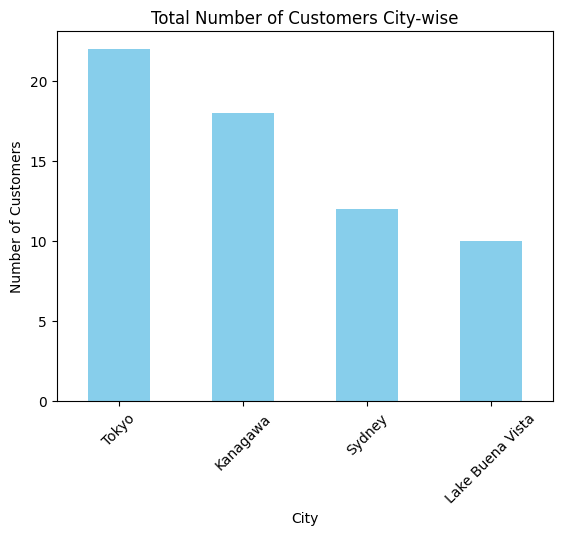

In [116]:
city_counts = customer_df['city'].value_counts()
print(city_counts)
city_counts.plot(kind='bar',color='skyblue')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.title('Total Number of Customers City-wise')
plt.xticks(rotation=45)
plt.show()

<h2>Observation:</h2>

Tokyo is the highest number of customers and Lake Buena Vista is the lowest number of customer.

<h1>Identify the most frequent customers based on their order history</h1>

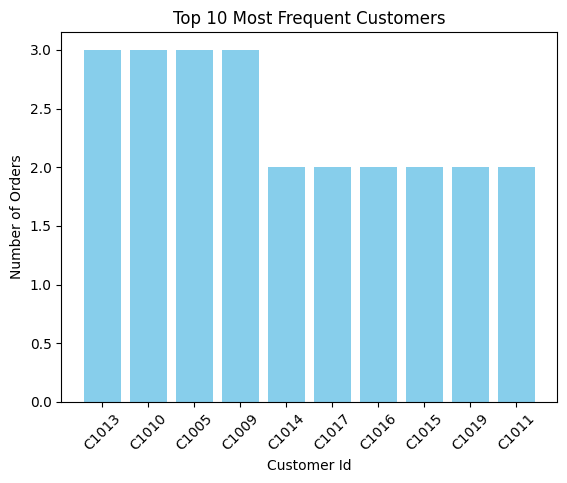

In [93]:
customer_counts = order_df['customer_id'].value_counts()
customer_counts = customer_counts.sort_values(ascending=False)
top_n = 10  # Change this value to select the desired number of top customers
top_customers = customer_counts[:top_n]
plt.bar(top_customers.index, top_customers.values,color='skyblue')
plt.xlabel('Customer Id')
plt.ylabel('Number of Orders')
plt.title('Top {} Most Frequent Customers'.format(top_n))
plt.xticks(rotation=45)
plt.show()

<h2>Observation:</h2>

Within Top 10 most frequent customers id's are c1013,c1010,c1005,c1009,c1014,c1017,c1016,c1015,c1019,c1011.

<h1>Determine the total number of products available by category</h1>

category
Appliance      20
Electronics    32
Furniture       9
Name: product_id, dtype: int64


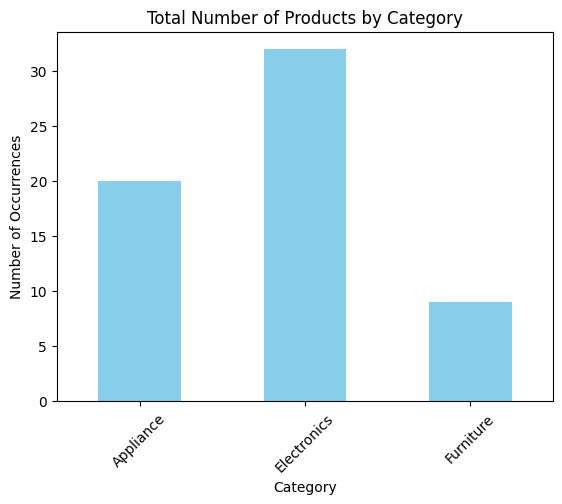

In [94]:
category_counts = product_df.groupby('category')['product_id'].count()
print(category_counts)
category_counts.plot(kind='bar',color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Occurrences')
plt.title('Total Number of Products by Category')
plt.xticks(rotation=45)
plt.show()

<h2>Observation:</h2>

Highest number of occurrences of catagory is Electronics and then Appliance and lowest is Furniture.

<h1>Analyze the distribution of products across sub-categories.
</h1>

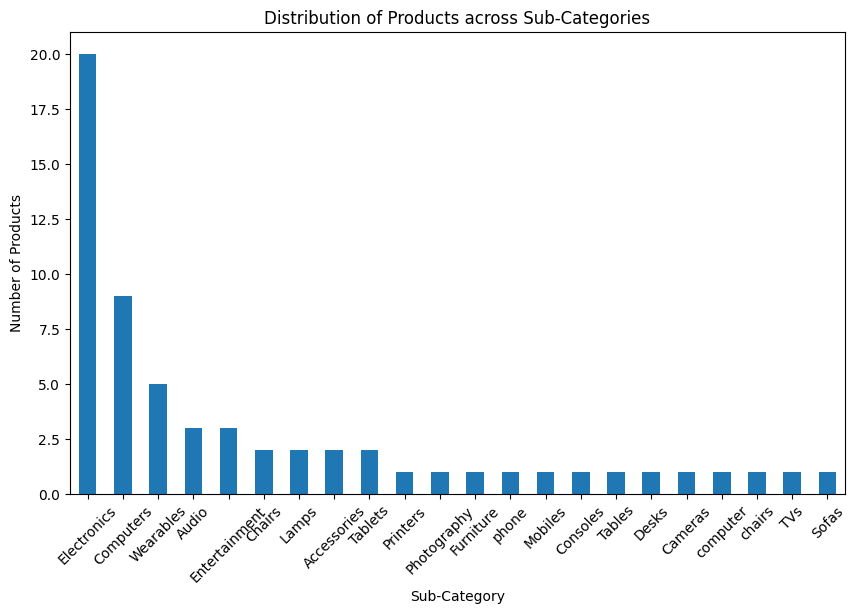

In [95]:
sub_category_counts = product_df['sub_category'].value_counts()
sub_category_counts = sub_category_counts.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sub_category_counts.plot(kind='bar')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Products')
plt.title('Distribution of Products across Sub-Categories')
plt.xticks(rotation=45)
plt.show()

<h2>Observation:</h2>

Highest distribution of product across sub-category is Electrocnics and lowest are Printers to Sofas.

<h1>Identify products with low stock levels</h1>

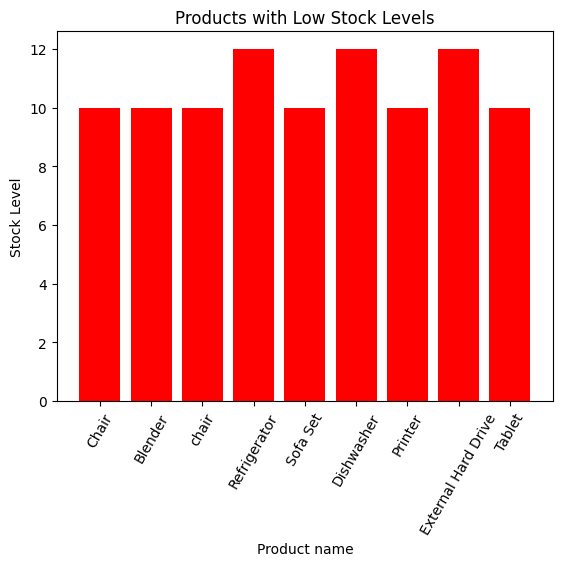

In [96]:
low_stock_threshold = 15

# Filter products with low stock levels
low_stock_products = product_df[product_df['stock'] < low_stock_threshold]

# Draw a bar chart
plt.bar( low_stock_products['product_name'], low_stock_products['stock'], color='red')

# Adding labels and title
plt.xlabel('Product name')
plt.ylabel('Stock Level')
plt.title('Products with Low Stock Levels')
plt.xticks(rotation=60)
# Show the plot
plt.show()

<h1>Observation</h1>
Lowest stock level Refrigerator and Dishwasher and Extenal Hard Drive and so on

<h1>Calculate the average, maximum, and minimum selling prices for
products</h1>

17774.62262295082 70000.0 450.0


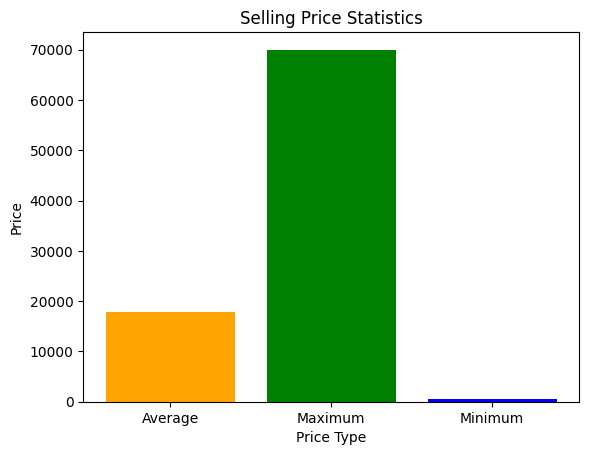

In [97]:
average_price = product_df['selling_price'].mean()
maximum_price = product_df['selling_price'].max()
minimum_price = product_df['selling_price'].min()
print(average_price, maximum_price, minimum_price)
data = {'Average':average_price, 'Maximum': maximum_price, 'Minimum': minimum_price}
plt.bar(data.keys(), data.values(),color=['orange','green','blue'])
plt.xlabel('Price Type')
plt.ylabel('Price')
plt.title('Selling Price Statistics')
plt.show()


<h2>Observation:</h2>

Maximum Selling price for product is high, Average selling price for product is medium and minimum selling price for product is low.

<h1>Calculate the top 10 orders product wise</h1>

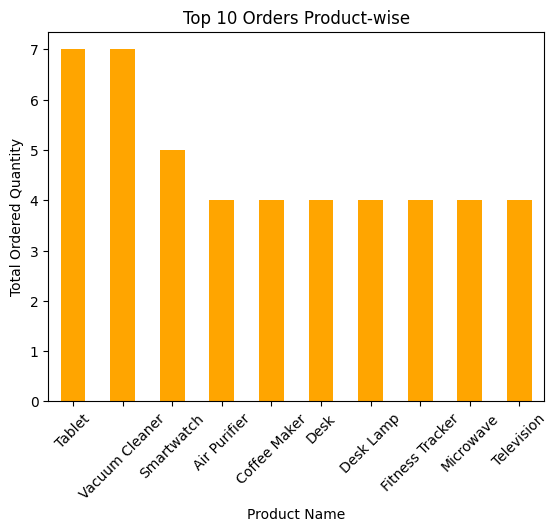

In [98]:
result_df = pd.merge(order_df, product_df, on='product_id', how='inner')

# Calculate the top 10 orders product-wise
top_orders = result_df.groupby('product_name')['quantity'].sum().nlargest(10)

# Draw a bar chart
top_orders.plot(kind='bar', color='orange')

# Adding labels and title
plt.xlabel('Product Name')
plt.ylabel('Total Ordered Quantity')
plt.title('Top 10 Orders Product-wise')
plt.xticks(rotation=45)
# Show the plot
plt.show()

<h2>Observation:</h2>

Total highest order product is Tablet and 10th position product is Television.

<h1>Analyze the order status distribution .</h1>


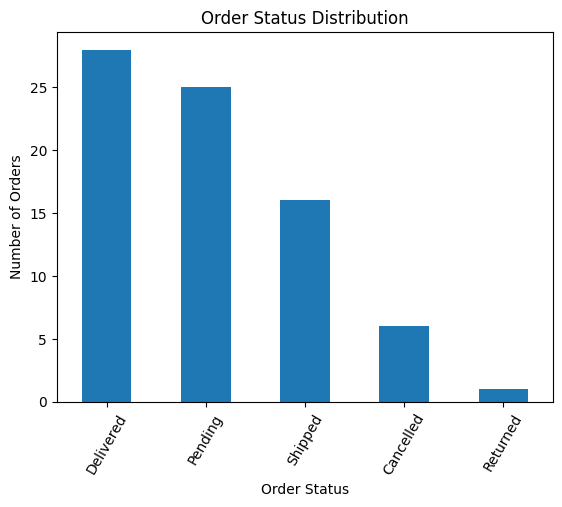

In [99]:
order_status_counts = order_df['order_status'].value_counts()

# Creating the bar chart
order_status_counts.plot(kind='bar')

# Adding labels and title
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.title('Order Status Distribution')
plt.xticks(rotation=60)
# Display the chart
plt.show()

<h2>Observation:</h2>

according to order status highest distributed product is Delivered and lowest  is Returned product.

<h1>Identify the most popular products based on order quantity</h1>

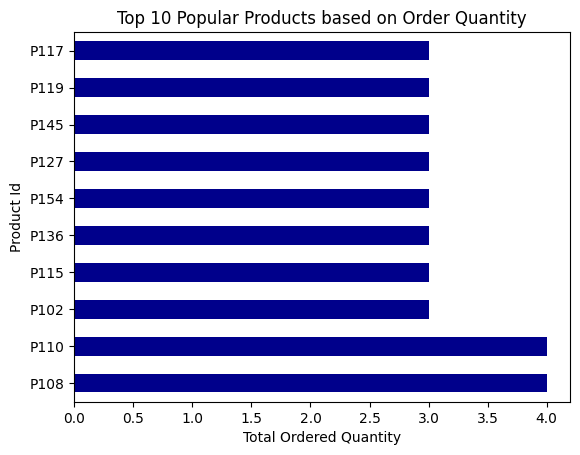

In [100]:
product_quantities = order_df.groupby('product_id')['quantity'].sum().sort_values(ascending=False)

# Selecting the top N products (change N to the desired number)
top_n = 10
top_products = product_quantities.head(top_n)

# Creating the horizontal bar chart
top_products.plot(kind='barh',color='darkblue')

# Adding labels and title
plt.xlabel('Total Ordered Quantity')
plt.ylabel('Product Id')
plt.title('Top {} Popular Products based on Order Quantity'.format(top_n))

# Display the chart
plt.show()

<h2>Observation:</h2>

hihgest order quantity is p110 ad p108 then lowest p102,p115 etc.

<h1>Calculate total revenue generated from orders product wise</h1>

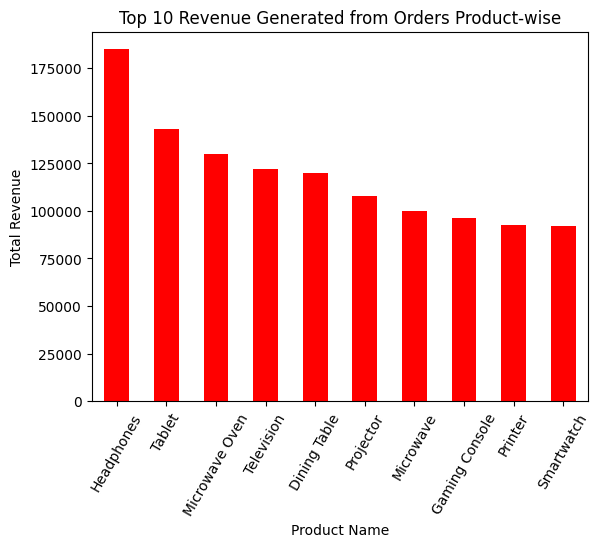

In [101]:
product_df['TotalRevenue'] = order_df['quantity'] * order_df['total_price']
product_revenue = product_df.groupby('product_name')['TotalRevenue'].sum().sort_values(ascending=False)
top_n = 10
product_revenue = product_revenue.head(top_n)

# Creating the bar chart
product_revenue.plot(kind='bar',color='red')

# Adding labels and title
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.title('Top 10 Revenue Generated from Orders Product-wise')
plt.xticks(rotation=60)
# Display the chart
plt.show()

<h2>Observation:</h2>

According to the revenue Headphones is the highest revenue and Smartwatch is the lowest revenue.

<h1>Calculate total revenue product category wise percentage</h2>

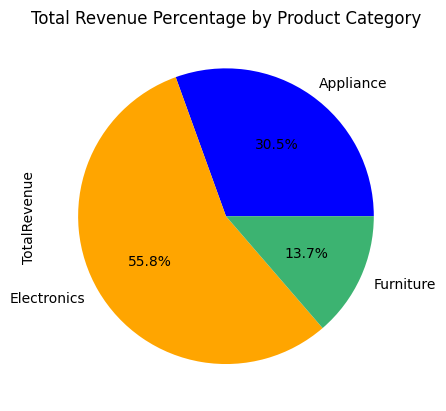

In [102]:
product_df['TotalRevenue'] = order_df['quantity'] * order_df['total_price']
category_revenue = product_df.groupby('category')['TotalRevenue'].sum()

# Calculate the percentage of total revenue for each category
total_revenue = product_df['TotalRevenue'].sum()
category_percentage = (category_revenue / total_revenue) * 100

# Creating the pie chart
category_percentage.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange', 'mediumseagreen'])

# Adding title
plt.title('Total Revenue Percentage by Product Category')

# Display the chart
plt.show()

<h2>Observation:</h2>

Electronics total revenue is highest 55.8% and lowest revenue is 13.7%

 <h1>Calculate the total revenue generated from all orders</h1>

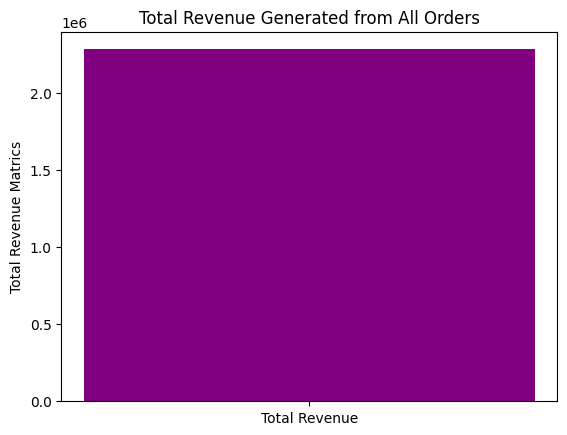

In [103]:
order_df['TotalRevenue'] = order_df['quantity'] * order_df['total_price']

# Calculate the total revenue
total_revenue = order_df['TotalRevenue'].sum()
print()
# Creating a bar chart for total revenue
plt.bar(['Total Revenue'], [total_revenue], color='purple')

# Adding labels and title
plt.ylabel('Total Revenue Matrics')
plt.title('Total Revenue Generated from All Orders')

# Display the chart
plt.show()

<h2>Observation:</h2>

total revenue for all orfers is 2284400.0

<h1>Identify the most profitable products based on the difference between
original and selling prices</h2>

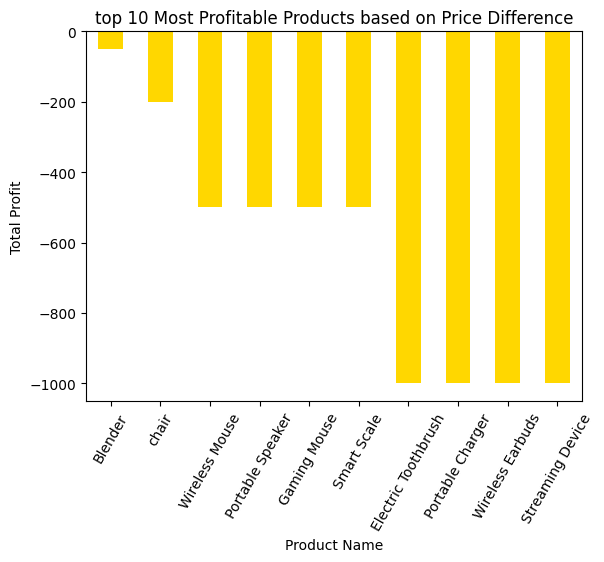

In [104]:
product_df['Profit'] =product_df['selling_price'] - product_df['original_price']
product_profit = product_df.groupby('product_name')['Profit'].sum().sort_values(ascending=False)

top_n = 10
product_profit = product_profit.head(top_n)
# Creating the bar chart
product_profit.plot(kind='bar', color='gold')

# Adding labels and title
plt.xlabel('Product Name')
plt.ylabel('Total Profit')
plt.title('top 10 Most Profitable Products based on Price Difference')
plt.xticks(rotation=60)
# Display the chart
plt.show()

<h2>Observation:</h2>

Streaming Device is the hig selling price and Blender is the lowest selling price.

<h1>Identify product names with the highest and lowest order quantities</h1>

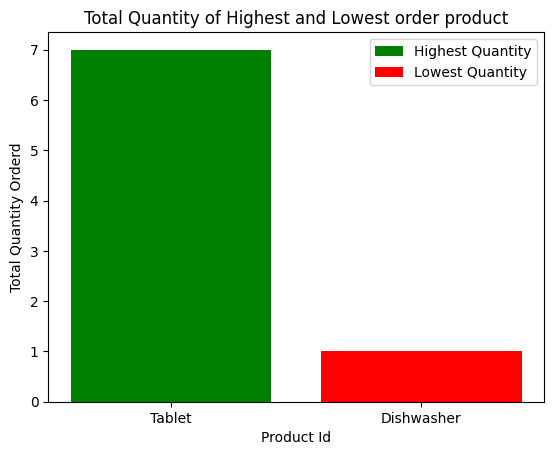

In [105]:
result_df = pd.merge(order_df, product_df, on='product_id', how='inner')

product_quantities = result_df.groupby('product_name')['quantity'].sum()

# Find the product with the highest order quantity
max_quantity_product = product_quantities.idxmax()

# Find the product with the lowest order quantity
min_quantity_product = product_quantities.idxmin()

# Creating the bar chart
#product_quantities.plot(kind='bar', color='skyblue')

# Highlighting the highest and lowest order quantities
plt.bar(max_quantity_product, product_quantities[max_quantity_product], color='green', label='Highest Quantity')
plt.bar(min_quantity_product, product_quantities[min_quantity_product], color='red', label='Lowest Quantity')

# Adding labels and title
plt.xlabel('Product Id')
plt.ylabel('Total Quantity Orderd')
plt.title('Total Quantity of Highest and Lowest order product')

# Adding legend
plt.legend()

<h2>Observation:</h2>

highest order product is Tablet and Dishwasher is the lowest .

<h1>Identify customers with the highest and lowest order quantities by
customer name</h1>

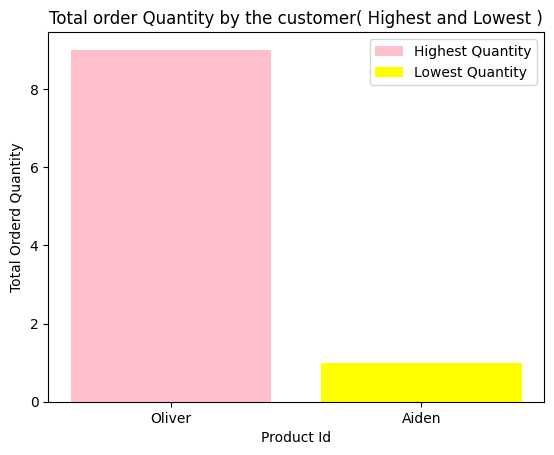

In [106]:
result_df = pd.merge(order_df, customer_df, on='customer_id', how='inner')

product_quantities = result_df.groupby('name')['quantity'].sum()

# Find the product with the highest order quantity
max_quantity_product = product_quantities.idxmax()

# Find the product with the lowest order quantity
min_quantity_product = product_quantities.idxmin()

# Creating the bar chart
#product_quantities.plot(kind='bar', color='skyblue')

# Highlighting the highest and lowest order quantities
plt.bar(max_quantity_product, product_quantities[max_quantity_product], color='pink', label='Highest Quantity')
plt.bar(min_quantity_product, product_quantities[min_quantity_product], color='yellow', label='Lowest Quantity')

# Adding labels and title
plt.xlabel('Product Id')
plt.ylabel('Total Orderd Quantity')
plt.title('Total order Quantity by the customer( Highest and Lowest )')

# Adding legend
plt.legend()

<h2>Observation:</h2>

Oliver orderd highest quantity and Aiden is the lowest

<h1>Determine the most preferred payment modes.
</h1>

payment_mode
Online    43
COD       33
Name: count, dtype: int64


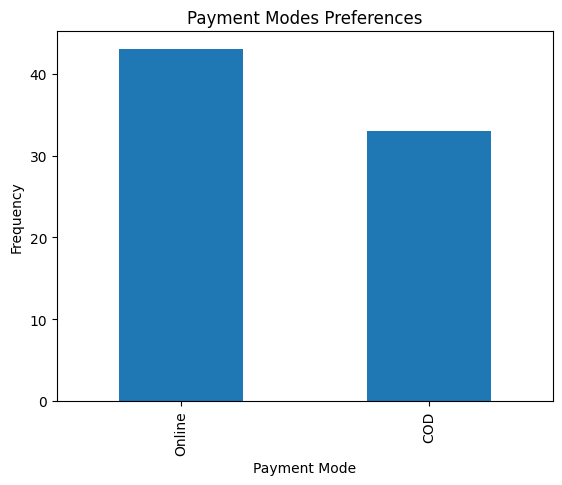

In [107]:
payment_modes_counts = order_df['payment_mode'].value_counts()
print(payment_modes_counts)
# Creating the bar chart
payment_modes_counts.plot(kind='bar')

# Adding labels and title
plt.xlabel('Payment Mode')
plt.ylabel('Frequency')
plt.title('Payment Modes Preferences')
plt.show()

<h2>Observation:</h2>

customers are very preferred payment on online mode rather than COD.

<h1>Month wise total sales.</h1>

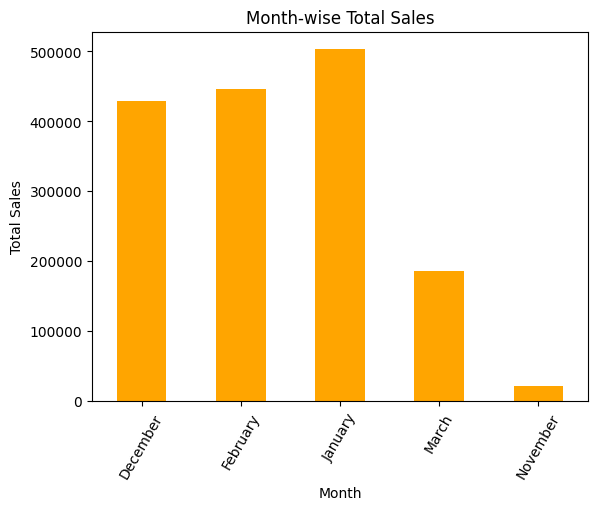

In [108]:
order_df['order_date'] = pd.to_datetime(order_df['order_date'])  # Convert 'OrderDate' to datetime format
order_df['Month'] = order_df['order_date'].dt.month_name()  # Extract month names from 'OrderDate'

# Group by month and calculate total sales
monthly_sales = order_df.groupby('Month')['total_price'].sum()

# Creating the bar chart
monthly_sales.plot(kind='bar', color='orange')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Month-wise Total Sales')
plt.xticks(rotation=60)
# Display the chart
plt.show()

<h2>Observation:</h2>

In month of January was highest sales, and in November was lowest. 

<h1> Month and year wise total sales</h1>

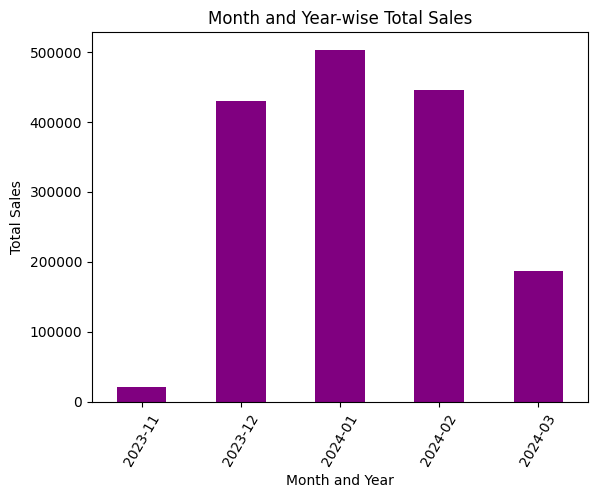

In [109]:
order_df['order_date'] = pd.to_datetime(order_df['order_date'])  # Convert 'OrderDate' to datetime format
order_df['MonthYear'] = order_df['order_date'].dt.to_period('M')  # Extract month and year as a Period object

# Group by month and year and calculate total sales
monthly_sales = order_df.groupby('MonthYear')['total_price'].sum()

# Creating the bar chart
monthly_sales.plot(kind='bar', color='purple')

# Adding labels and title
plt.xlabel('Month and Year')
plt.ylabel('Total Sales')
plt.title('Month and Year-wise Total Sales')
plt.xticks(rotation=60)
# Display the chart
plt.show()

<h2>Observation:</h2>

in 2024 january was the highest sales and 2023-November was lowest.

<h1>Identify peak order date</h1>

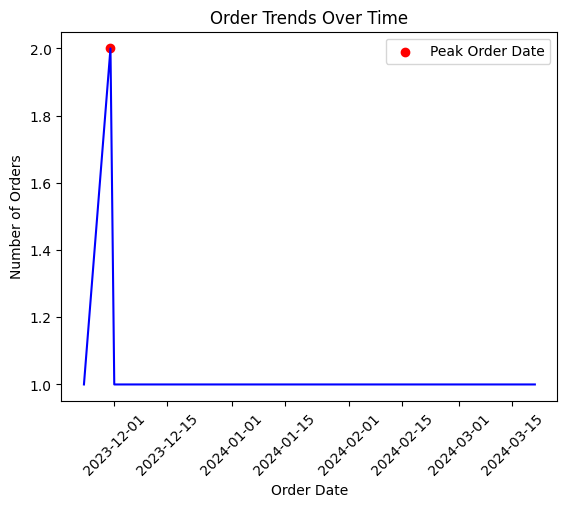

In [110]:
order_df['order_date'] = pd.to_datetime(order_df['order_date'])

# Group by order date and calculate the total number of orders for each date
orders_by_date = order_df.groupby('order_date').size()

# Find the peak order date
peak_order_date = orders_by_date.idxmax()

# Draw a line chart
plt.plot(orders_by_date.index, orders_by_date.values, color='blue')

# Highlight the peak order date with a red marker
plt.scatter(peak_order_date, orders_by_date.loc[peak_order_date], color='red', label='Peak Order Date' )

# Adding labels and title
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.title('Order Trends Over Time')

# Adding legend
plt.legend()
plt.xticks(rotation=45)
# Show the plot
plt.show()

<h2>Observation:</h2>

Tokio's customer is highest orderd and Lake Buneva Vista is lowest

<h1>Analyze whether certain products or categories are more popular in a
specific city.
</h1>

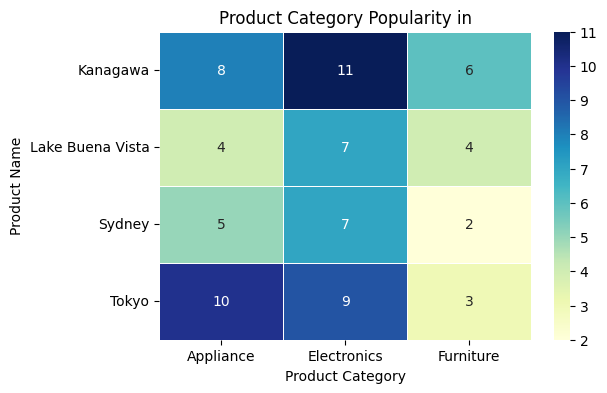

In [112]:
# Merge orders, products, and customers tables
merged_data = pd.merge(order_df, product_df, on='product_id', how='inner')
merged_data = pd.merge(merged_data, customer_df, on='customer_id', how='inner')

# Calculate the total quantity sold for each product category in the selected city
category_quantity_pivot = merged_data.groupby(['city','category']).size().unstack().fillna(0)

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(category_quantity_pivot, cmap='YlGnBu', annot=True, fmt='', linewidths=.5)
plt.title(f'Product Category Popularity in')
plt.xlabel('Product Category')
plt.ylabel('Product Name')
plt.show()

<h1>Identify the best-selling products</h1>

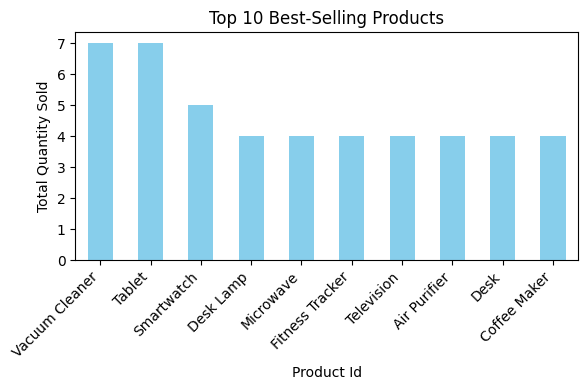

In [113]:
result_df = pd.merge(order_df, product_df, on='product_id', how='inner')

best_selling_products = result_df.groupby('product_name')['quantity'].sum().sort_values(ascending=False)

# Select the top N best-selling products (change N to the desired number)
top_n = 10
top_selling_products = best_selling_products.head(top_n)

# Creating the bar chart
plt.figure(figsize=(6, 4))
top_selling_products.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Product Id')
plt.ylabel('Total Quantity Sold')
plt.title('Top {} Best-Selling Products'.format(top_n))

# Display the chart
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h2>Observation:</h2>

Vacuum cleaner is the highest selling product also Tablet and top 10 is coffee maker.

<h1>Identify top 10 slow-moving products based on low sales</h1>

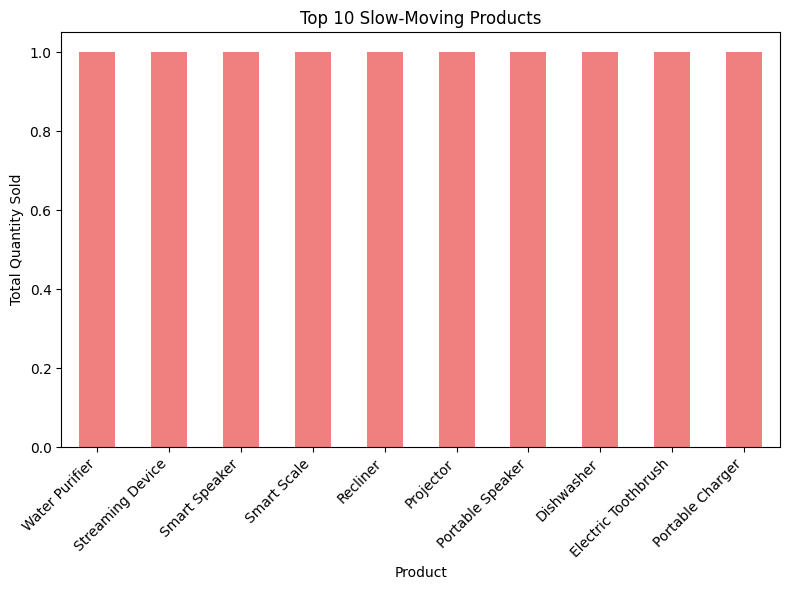

In [114]:
result_df = pd.merge(order_df, product_df, on='product_id', how='inner')

low_selling_products = result_df.groupby('product_name')['quantity'].sum().sort_values(ascending=True)

# Select the top 10 slow-moving products
top_slow_products = low_selling_products.head(10)

# Creating the bar chart
plt.figure(figsize=(6,4))
top_slow_products.plot(kind='bar', color='lightcoral',figsize=(8,6))

# Adding labels and title
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Slow-Moving Products')

# Display the chart
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h2>Observation:</h2>

top 10 slow moving products are water purifire streaming device etc.

<h1>Conclusion:</h1>

<h3>Product Table:</h3>

Check for product completeness and accuracy.
Ensure that product information such as name, description, price, and availability is consistent and up-to-date.

<h3>Customer Table:</h3>
Verify that customer information is accurate and complete.
Assess customer demographics and purchasing behavior.

<h3>Order Table:</h3>
Analyze order data to understand customer preferences and popular products.
Evaluate order fulfillment and delivery times.
Monitor order status and identify any issues with the order processing system.

<h3>Integration:</h3>
Ensure proper integration between the product, customer, and order tables to avoid inconsistencies and errors.
Check for referential integrity, making sure that foreign keys in the order table correspond to primary keys in the product and customer tables.

<h3>Sales Analysis:</h3>
Calculate total sales, average order value, and other relevant metrics.
Identify top-selling products and categories.
Evaluate customer lifetime value and retention.

<h3>Customer Experience:</h3>
Assess customer satisfaction based on order feedback or reviews.
Identify any patterns or trends in customer issues.

<h3>Inventory Management:</h3>
Evaluate product stock levels and identify any products that are frequently out of stock.
Optimize inventory management processes to prevent overstock or stockouts.

<h3>Data Quality:</h3>
Ensure data accuracy and consistency across all tables.
Regularly update and maintain the data to reflect changes in products, customers, and orders.

<h3>Security:</h3>
Implement measures to secure customer data and ensure  with privacy regulations.

<h3>Future Considerations:</h3>
Explore opportunities for personalization based on customer preferences.
Consider implementing data analytics and machine learning techniques for predictive analysis and improving business intelligence.